In [1]:
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import math
import sklearn

In [2]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator instance with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=40,            # Rotate images randomly by up to 40 degrees
    width_shift_range=0.2,        # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,       # Shift images vertically by up to 20% of the height
    shear_range=0.2,              # Apply random shearing transformations
    zoom_range=0.2,               # Zoom into images randomly
    horizontal_flip=True,         # Flip images horizontally
    fill_mode='nearest',          # Fill new pixels with nearest value
    validation_split=0.2          # Reserve 20% of data for validation
)




In [3]:
classes=["Biodegradable","Non-biodegradable"]

In [4]:

import matplotlib.pyplot as plt


def plot_augmented_images(images_arr, labels):

    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()  
    
    for img, ax, label in zip(images_arr, axes, labels):
        
        ax.imshow(img)
        ax.set_title(classes[math.ceil(label)])  
        ax.axis('off')  
    
    plt.tight_layout()
    plt.show()

    

In [5]:
# # Create a training data generator
# initial_generator = datagen.flow_from_directory(
#     "Dataset//train", 
#     target_size=(64, 64),   # Resize images to 64x64
#     batch_size=1,          
#     class_mode='binary',  
#     shuffle=False           
# )

total_images = len(initial_generator.filenames)

train_generator = datagen.flow_from_directory(
    "Dataset//train",
    target_size=(64, 64),   # Resize images to 64x64
    batch_size=total_images, 
    class_mode='binary',  
    shuffle=False           
)



Found 24737 images belonging to 2 classes.
Found 24737 images belonging to 2 classes.


In [6]:
# # Load a single image to visualize augmentations
# img_path = 'path_to_a_single_image.jpg'
# img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))
# x = tf.keras.preprocessing.image.img_to_array(img)
# x = x.reshape((1,) + x.shape)

# # Generate augmented images
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(batch[0].astype('uint8'))
#     i += 1
#     if i % 5 == 0:  # Display 5 images
#         break

# plt.show()

In [7]:
train_generator.class_indices

{'B': 0, 'N': 1}

In [8]:
type(train_generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
images,labels=next(train_generator)
images.shape
# labels[:5]

c:\Users\Nilang\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(24737, 64, 64, 3)

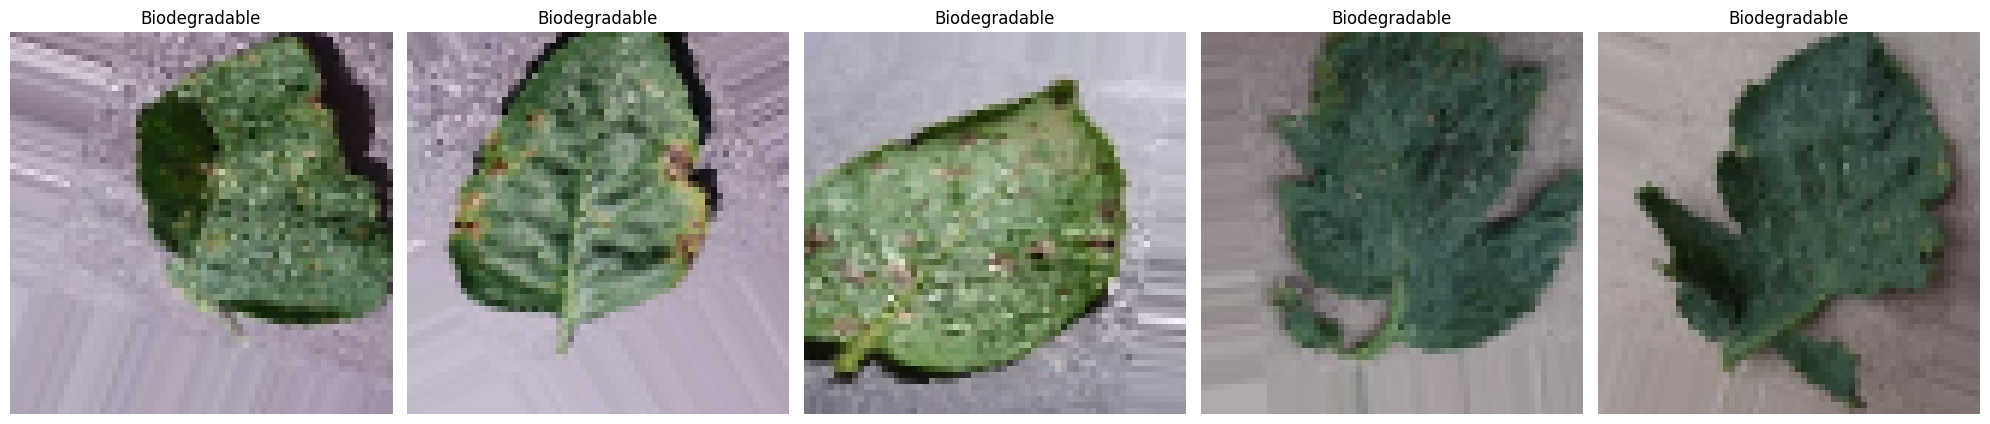

In [11]:
plot_augmented_images(images,labels)


In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

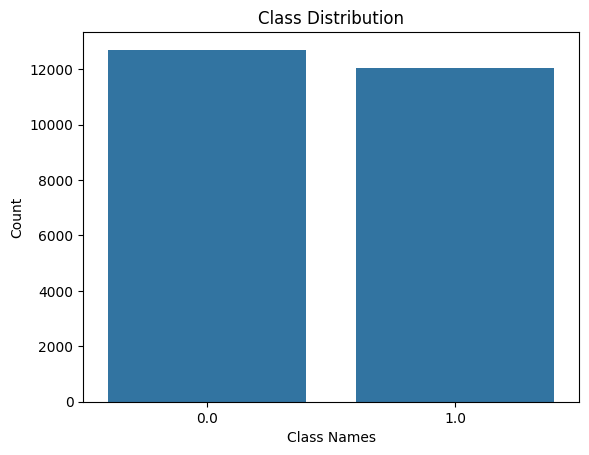

In [13]:
import seaborn as sns
sns.countplot(x = labels)
plt.title("Class Distribution")
plt.xlabel("Class Names")
plt.ylabel("Count")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [15]:
X_train[0]

array([[[0.6995462 , 0.5779776 , 0.4039216 ],
        [0.7151611 , 0.59560674, 0.42507207],
        [0.7450919 , 0.6290589 , 0.46204546],
        ...,
        [0.8287271 , 0.6797075 , 0.35472775],
        [0.82069266, 0.6750522 , 0.35632038],
        [0.82888407, 0.6868781 , 0.37850717]],

       [[0.7071891 , 0.58562046, 0.40457493],
        [0.7036678 , 0.5820992 , 0.4039216 ],
        [0.7001465 , 0.5785779 , 0.4039216 ],
        ...,
        [0.824261  , 0.67683643, 0.3545362 ],
        [0.8235315 , 0.6797413 , 0.36601785],
        [0.82524824, 0.6820303 , 0.37104434]],

       [[0.7153852 , 0.5938166 , 0.41005608],
        [0.7113107 , 0.58974206, 0.40663573],
        [0.7077894 , 0.5862208 , 0.40487513],
        ...,
        [0.8205605 , 0.6749862 , 0.35638645],
        [0.82908225, 0.68714225, 0.3789695 ],
        [0.8141469 , 0.66722846, 0.34699133]],

       ...,

       [[0.7882368 , 0.6894844 , 0.42103416],
        [0.8248074 , 0.7228466 , 0.429155  ],
        [0.83418334, 0

In [16]:
X_train.shape

(19789, 64, 64, 3)

In [17]:
X_test.shape

(4948, 64, 64, 3)

In [18]:
val_generator = datagen.flow_from_directory(
    'Dataset/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 1201 images belonging to 2 classes.


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense,Dropout

ann = Sequential([
    Input(shape=(64, 64, 3)),  
    Flatten(),                   
    Dense(1200, activation='relu'),
    Dropout(0.5),
    Dense(300, activation='relu'),
    Dense(1, activation='sigmoid'),  
])


In [20]:
learning_rate=0.00012
optimizer = Adam(learning_rate=learning_rate)
ann.compile(
    optimizer=optimizer,              
    loss='binary_crossentropy',       
    metrics=['accuracy']# Evaluate the model using accuracy
)

In [21]:
ann.fit(X_train,y_train,epochs=5,batch_size=32);

Epoch 1/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.6983 - loss: 0.6082
Epoch 2/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7769 - loss: 0.4812
Epoch 3/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7872 - loss: 0.4584
Epoch 4/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8025 - loss: 0.4459
Epoch 5/5
619/619 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8054 - loss: 0.4356


In [22]:
labels

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [23]:
ann.evaluate(X_test,y_test)

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8345 - loss: 0.4131


[0.42317864298820496, 0.82780921459198]

In [24]:
from sklearn.metrics import classification_report

y_pred = (ann.predict(X_test) > 0.5).astype("int32")

report = classification_report(y_test, y_pred, zero_division=1)
print(report) 


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2601
         1.0       0.86      0.77      0.81      2347

    accuracy                           0.83      4948
   macro avg       0.83      0.82      0.83      4948
weighted avg       0.83      0.83      0.83      4948



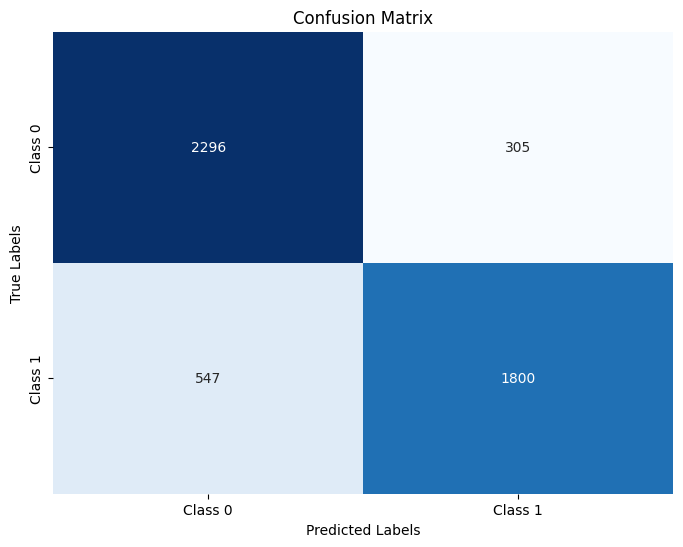

In [25]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2296  305]
 [ 547 1800]]


In [27]:
# Print the first few true labels and predictions
for i in range(10):
    print(f"True Label: {y_test[i]}, Predicted Label: {y_pred[i]}")


True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 0.0, Predicted Label: [0]
True Label: 1.0, Predicted Label: [1]
True Label: 1.0, Predicted Label: [1]


In [28]:
unique, counts = np.unique(y_test, return_counts=True)
print("Class distribution in y_test:", dict(zip(unique, counts)))


Class distribution in y_test: {0.0: 2601, 1.0: 2347}


In [29]:
from sklearn.metrics import classification_report

# Calculate the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2601
         1.0       0.86      0.77      0.81      2347

    accuracy                           0.83      4948
   macro avg       0.83      0.82      0.83      4948
weighted avg       0.83      0.83      0.83      4948



In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.utils import class_weight


# Define the model
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
# Output Layer
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Early Stopping Configuration
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    min_delta=0.00,  # Adjust this if necessary
    patience=20,
    restore_best_weights=True,
    verbose=1  # Set to 1 to get more detailed output
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))

CustomCNN = model.fit(X_train, y_train, batch_size=64, epochs=10, 
                    callbacks=[early_stopping], 
                    class_weight=class_weights_dict,  # Add class weights here
                    validation_data=(X_train, y_train))  # Ensure you have validation data

model.save('CustomCNN_model.h5')



c:\Users\Nilang\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 45s 135ms/step - accuracy: 0.7222 - loss: 0.7401 - val_accuracy: 0.7047 - val_loss: 0.5316
Epoch 2/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.7944 - loss: 0.5314 - val_accuracy: 0.8513 - val_loss: 0.3573
Epoch 3/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.8113 - loss: 0.4762 - val_accuracy: 0.8423 - val_loss: 0.3722
Epoch 4/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.8196 - loss: 0.4370 - val_accuracy: 0.8732 - val_loss: 0.3164
Epoch 5/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.8351 - loss: 0.4007 - val_accuracy: 0.8802 - val_loss: 0.3045
Epoch 6/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8435 - loss: 0.3814 - val_accuracy: 0.8767 - val_loss: 0.3107
Epoch 7/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.8515 - loss: 0.3661 - val_accuracy: 0.8880 - val_loss: 0.2796
Epoch 8/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 132ms/step - accuracy: 0.8610 - loss: 0

In [32]:
predictions = model.predict(X_test)

# Convert predictions to class labels
model_predictions = np.argmax(predictions, axis=1)
print(model_predictions)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
[1 0 1 ... 0 1 1]


In [33]:
model_accuracy = model.evaluate(X_test, y_test, verbose=0) 
print('Test accuracy:', model_accuracy[1])


Test accuracy: 0.8813661932945251


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


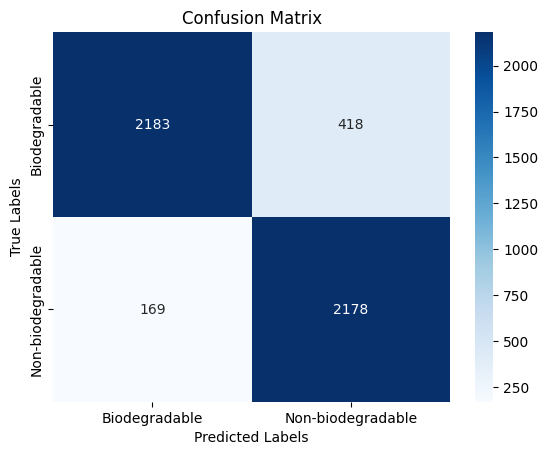

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)  

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [35]:
def scores(cm):
    p = {}
    r = {}
    f1 = {}
    
    for i in range(len(cm)):
        p[i] = cm[i,i] / sum(cm[:,i])
        r[i] = cm[i,i] / sum(cm[i,:])
        f1[i] = 2 * (cm[i,i] / sum(cm[:,i])) * (cm[i,i]/sum(cm[i,:])) / ((cm[i,i] / sum(cm[:,i])) + (cm[i,i]/sum(cm[i,:])))
    
    return p,r,f1  


In [36]:
precision, recall, f1_score = scores(cm)

In [37]:
import pandas as pd
Evaluation = {
    'Precision' : precision,
    'Recall' : recall,
    'F1 Score' : f1_score
}

Result = pd.DataFrame(Evaluation)

Result

,Precision,Recall,F1 Score
0,0.928146,0.839293,0.881486
1,0.838983,0.927993,0.881246


In [38]:
import cv2

def capture_image_on_enter():
    
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None
    
    print("Press 'Enter' to capture the image.")
    
    while True:
        
        ret, frame = cap.read()
        
        cv2.imshow('Live Feed - Press Enter to Capture', frame)
        
        if cv2.waitKey(1) == 13:  # 13 is the Enter key
            break
    
    cap.release()
    cv2.destroyAllWindows()
    
    if not ret:
        print("Error: Could not read image from webcam.")
        return None
    
    return frame

image = capture_image_on_enter()

if image is not None:
    
    cv2.imwrite('custom_CNN_image.jpg', image)
    
    print("Image captured and saved as 'captured_image.jpg'.")
else:
    print("No image captured.")


Press 'Enter' to capture the image.
Image captured and saved as 'captured_image.jpg'.


In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = 'captured_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))

img_array = image.img_to_array(img)

img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0 

prediction = model.predict(img_array)

print(prediction)

predicted_class = np.argmax(prediction[0])

# 0 corresponds to "Biodegradable"
# 1 corresponds to "Non-Biodegradable"
if predicted_class == 1:
    print("The image is classified as Non-Biodegradable")
else:
    print("The image is classified as Biodegradable")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.10099716 0.89900285]]
The image is classified as Non-Biodegradable
